In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## 5 Year Breakeven Data

In [2]:
y5_BE = pd.read_csv("data/T5YIE.csv")
y5_BE.columns = ["Date", "5Y_Breakeven"]
y5_BE = y5_BE.set_index("Date")
y5_BE.index = pd.to_datetime(y5_BE.index)
y5_BE.head()

,5Y_Breakeven
Date,
2003-01-02,1.30
2003-01-03,1.28
2003-01-06,1.31
2003-01-07,1.28
2003-01-08,1.33


## Event Data

In [3]:
CPI_release = pd.read_excel("data/release_dates.xlsx")
CPI_release.columns = ["Date"]
CPI_release = CPI_release.set_index("Date")
CPI_release["CPI Release Date"] = True
CPI_release.index = pd.to_datetime(CPI_release.index)
CPI_release

,CPI Release Date
Date,
1949-03-24,True
1949-04-22,True
1949-05-23,True
1949-06-24,True
1949-07-22,True
...,...
2025-01-15,True
2025-02-12,True
2025-03-12,True


In [4]:
UNR_release = pd.read_excel("data/release_dates_50.xlsx")
UNR_release.columns = ["Date"]
UNR_release = UNR_release.set_index("Date")
UNR_release["UNR Release Date"] = True
UNR_release.index = pd.to_datetime(UNR_release.index)
UNR_release

,UNR Release Date
Date,
1955-05-06,True
1955-06-07,True
1955-07-08,True
1955-08-09,True
1955-09-07,True
...,...
2025-01-10,True
2025-02-07,True
2025-03-07,True


In [5]:
inflation_event = y5_BE.join(CPI_release)
inflation_event = inflation_event.fillna(False)
inflation_event["5Y_Breakeven_change"] = inflation_event["5Y_Breakeven"].diff()
inflation_event = inflation_event.dropna()
inflation_event.head()

,5Y_Breakeven,CPI Release Date,5Y_Breakeven_change
Date,,,
2003-01-03,1.28,False,-0.02
2003-01-06,1.31,False,0.03
2003-01-07,1.28,False,-0.03
2003-01-08,1.33,False,0.05
2003-01-09,1.41,False,0.08


In [6]:
event_data = inflation_event.join(UNR_release)
event_data = event_data.fillna(False)
event_data["Event Release Date"] = (event_data["UNR Release Date"] | event_data["CPI Release Date"])
event_data

,5Y_Breakeven,CPI Release Date,5Y_Breakeven_change,UNR Release Date,Event Release Date
Date,,,,,
2003-01-03,1.28,False,-0.02,False,False
2003-01-06,1.31,False,0.03,False,False
2003-01-07,1.28,False,-0.03,False,False
2003-01-08,1.33,False,0.05,False,False
2003-01-09,1.41,False,0.08,False,False
...,...,...,...,...,...
2025-05-12,2.35,False,-0.04,False,False
2025-05-13,2.38,True,0.03,False,True
2025-05-14,2.44,False,0.06,False,False


In [7]:
event_occ = event_data.loc[event_data["Event Release Date"]]
event_occ

,5Y_Breakeven,CPI Release Date,5Y_Breakeven_change,UNR Release Date,Event Release Date
Date,,,,,
2003-01-10,1.4,False,-0.01,True,True
2003-01-16,1.4,True,-0.01,False,True
2003-02-07,1.6,False,-0.02,True,True
2003-02-21,1.73,True,0.04,False,True
2003-03-07,1.74,False,0.01,True,True
...,...,...,...,...,...
2025-03-12,2.53,True,0.03,False,True
2025-04-04,2.34,False,-0.16,True,True
2025-04-10,2.32,True,-0.13,False,True


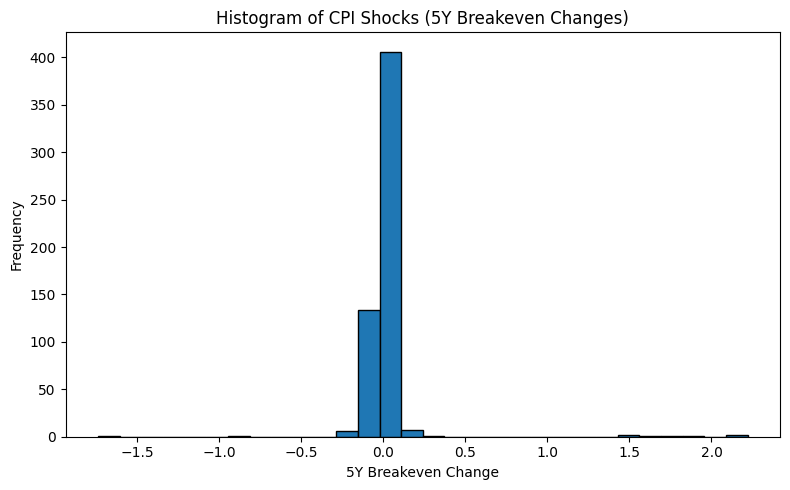

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(event_occ["5Y_Breakeven_change"], bins=30, edgecolor='black')
plt.title("Histogram of CPI Shocks (5Y Breakeven Changes)")
plt.xlabel("5Y Breakeven Change")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

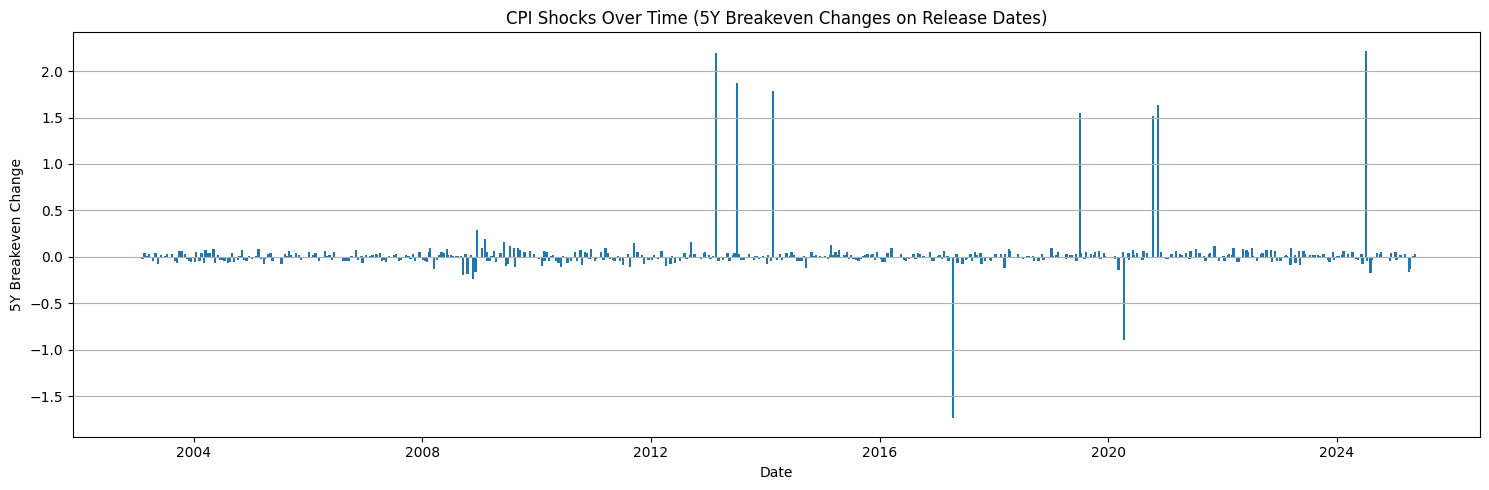

In [9]:
plt.figure(figsize=(15, 5))
plt.bar(event_occ.index, event_occ["5Y_Breakeven_change"], width=15)  # Width in days
plt.title("CPI Shocks Over Time (5Y Breakeven Changes on Release Dates)")
plt.xlabel("Date")
plt.ylabel("5Y Breakeven Change")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [10]:
nonevent_data = event_data.loc[(event_data["Event Release Date"] == False)]
nonevent_data

,5Y_Breakeven,CPI Release Date,5Y_Breakeven_change,UNR Release Date,Event Release Date
Date,,,,,
2003-01-03,1.28,False,-0.02,False,False
2003-01-06,1.31,False,0.03,False,False
2003-01-07,1.28,False,-0.03,False,False
2003-01-08,1.33,False,0.05,False,False
2003-01-09,1.41,False,0.08,False,False
...,...,...,...,...,...
2025-05-09,2.39,False,0.00,False,False
2025-05-12,2.35,False,-0.04,False,False
2025-05-14,2.44,False,0.06,False,False


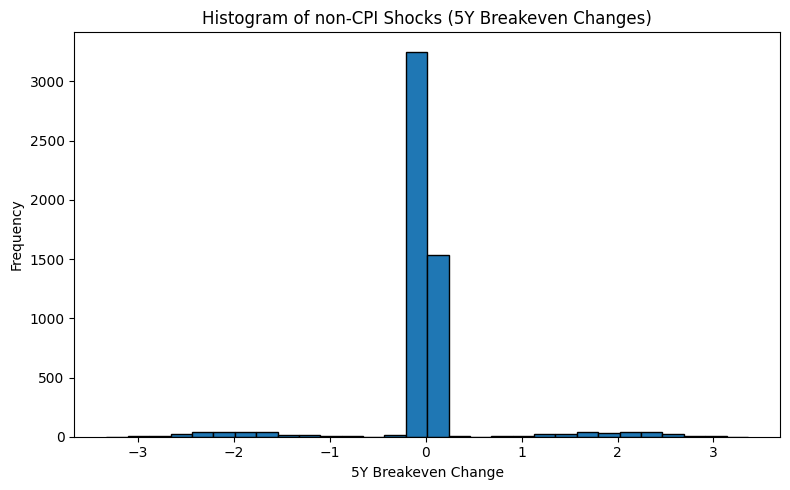

In [11]:
plt.figure(figsize=(8, 5))
plt.hist(nonevent_data["5Y_Breakeven_change"], bins=30, edgecolor='black')
plt.title("Histogram of non-CPI Shocks (5Y Breakeven Changes)")
plt.xlabel("5Y Breakeven Change")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

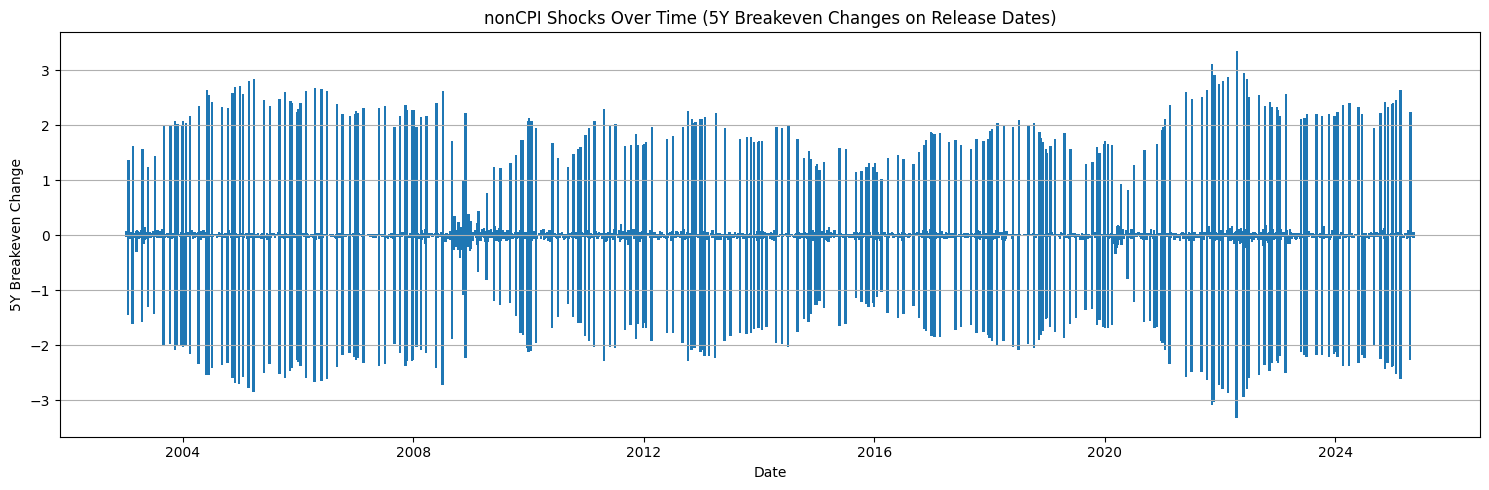

In [12]:
plt.figure(figsize=(15, 5))
plt.bar(nonevent_data.index, nonevent_data["5Y_Breakeven_change"], width=15)  # Width in days
plt.title("nonCPI Shocks Over Time (5Y Breakeven Changes on Release Dates)")
plt.xlabel("Date")
plt.ylabel("5Y Breakeven Change")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [36]:
tickers = pd.read_csv("data/SPY_IWM.csv")
tickers = tickers.rename(columns={"Price":"Date", "Close":"IWM Close", "Close.1":"SPY Close"}).iloc[2:][['Date', 'IWM Close', 'SPY Close']].set_index("Date")
tickers = tickers.dropna().astype(float)

In [37]:
tickers["SPY returns"] = tickers["SPY Close"].pct_change()
tickers["IWM returns"] = tickers["IWM Close"].pct_change()
tickers.head()

,IWM Close,SPY Close,SPY returns,IWM returns
Date,,,,
2000-05-26,33.020184,87.911804,NaN,NaN
2000-05-30,34.238968,90.778534,0.032609,0.036910
2000-05-31,34.363113,90.977615,0.002193,0.003626
2000-06-01,35.141785,92.570145,0.017505,0.022660
2000-06-02,36.969967,94.182655,0.017419,0.052023


In [38]:
tickers["spread"] = tickers["SPY returns"] - tickers["IWM returns"]
tickers.head()

,IWM Close,SPY Close,SPY returns,IWM returns,spread
Date,,,,,
2000-05-26,33.020184,87.911804,NaN,NaN,NaN
2000-05-30,34.238968,90.778534,0.032609,0.036910,-0.004301
2000-05-31,34.363113,90.977615,0.002193,0.003626,-0.001433
2000-06-01,35.141785,92.570145,0.017505,0.022660,-0.005155
2000-06-02,36.969967,94.182655,0.017419,0.052023,-0.034604


In [39]:
import statsmodels.api as sm

def regression_stats(df1, y_df, constant=True, ann=1):
    results = []  # To store results for each y variable

    for y_col in y_df.columns:
        y = y_df[y_col]

        # Add constant if needed
        if constant:
            df1_with_const = sm.add_constant(df1)
            column_names = ['Intercept'] + list(df1.columns)
        else:
            df1_with_const = df1
            column_names = list(df1.columns)

        # Fit the model
        model = sm.OLS(y, df1_with_const, missing='drop').fit()

        # Extract intercept and coefficients
        if constant:
            a = model.params[0] * ann  # Annualized intercept
            b = model.params[1:]
        else:
            a = 0
            b = model.params[:]

        # Residual stats
        r_2 = model.rsquared
        e = model.resid
        sig_e = float(np.std(e))

        # Prepare row
        row = {
            "Y Variable": y_col,
            "R-squared": r_2,
            "Residual Std. Dev.": sig_e
        }

        if constant:
            row["Intercept"] = a
            for i, name in enumerate(column_names[1:]):
                row[name] = b[i]
                row[f"{name} t-stat"] = model.tvalues[i+1]
                row[f"{name} p-value"] = model.pvalues[i+1]
                row[f"{name} Significant"] = "Yes" if model.pvalues[i+1] < 0.05 else "No"
        else:
            for i, name in enumerate(column_names):
                row[name] = b[i]
                row[f"{name} t-stat"] = model.tvalues[i]
                row[f"{name} p-value"] = model.pvalues[i]
                row[f"{name} Significant"] = "Yes" if model.pvalues[i] < 0.05 else "No"

        results.append(row)

    return pd.DataFrame(results).set_index("Y Variable")

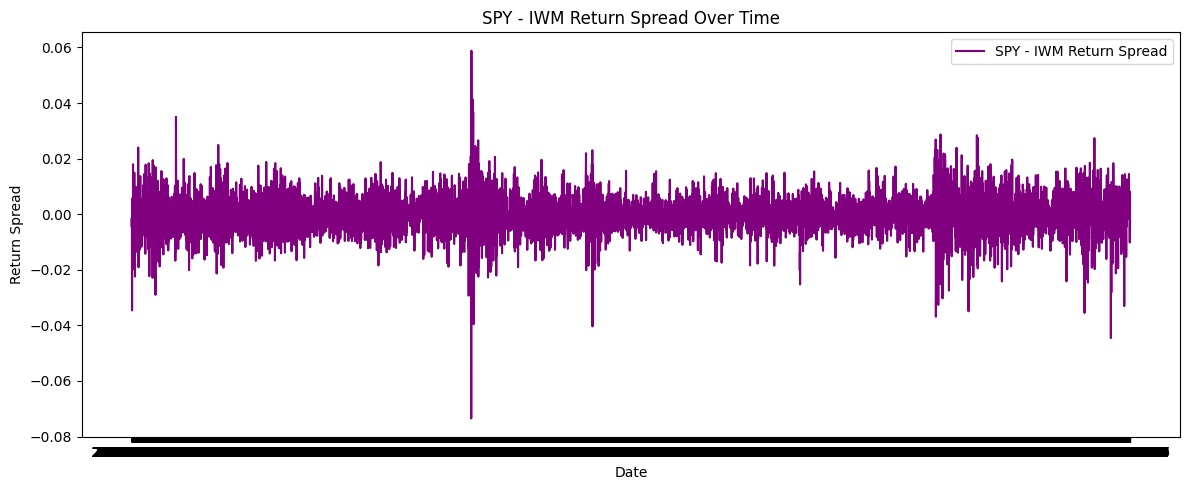

In [40]:
plt.figure(figsize=(12, 5))
plt.plot(tickers.index, tickers["spread"], label="SPY - IWM Return Spread", color="purple")
plt.title("SPY - IWM Return Spread Over Time")
plt.xlabel("Date")
plt.ylabel("Return Spread")
plt.tight_layout()
plt.legend()
plt.show()


In [41]:
encoded = event_data.copy()

encoded["Event_Positive"] = (encoded["Event Release Date"]) & (encoded["5Y_Breakeven_change"] > 0)
encoded["Event_Negative"] = (encoded["Event Release Date"]) & (encoded["5Y_Breakeven_change"] < 0)
encoded["Event_Zero"]     = (encoded["Event Release Date"]) & (encoded["5Y_Breakeven_change"] == 0)

encoded[["Event_Positive", "Event_Negative", "Event_Zero"]] = encoded[["Event_Positive", "Event_Negative", "Event_Zero"]].astype(int)
encoded

,5Y_Breakeven,CPI Release Date,5Y_Breakeven_change,UNR Release Date,Event Release Date,Event_Positive,Event_Negative,Event_Zero
Date,,,,,,,,
2003-01-03,1.28,False,-0.02,False,False,0,0,0
2003-01-06,1.31,False,0.03,False,False,0,0,0
2003-01-07,1.28,False,-0.03,False,False,0,0,0
2003-01-08,1.33,False,0.05,False,False,0,0,0
2003-01-09,1.41,False,0.08,False,False,0,0,0
...,...,...,...,...,...,...,...,...
2025-05-12,2.35,False,-0.04,False,False,0,0,0
2025-05-13,2.38,True,0.03,False,True,1,0,0
2025-05-14,2.44,False,0.06,False,False,0,0,0


In [42]:
X = encoded[["Event Release Date"]].astype(int)
Y = event_data[["5Y_Breakeven_change"]]

X_aligned, Y_aligned = Y.align(X, join="inner", axis=0)

# Run regression
regression_stats(Y_aligned, X_aligned, constant=True, ann=1)

,R-squared,Residual Std. Dev.,Intercept,Event Release Date,Event Release Date t-stat,Event Release Date p-value,Event Release Date Significant
Y Variable,,,,,,,
5Y_Breakeven_change,0.000124,0.577121,-0.001904,0.021726,0.848931,0.395955,No


## Testing Thresholds (Less than)

In [274]:
# Open and Close Oposition on the Day
lst = []

for num in np.arange(0.1, 3, 0.1):
    X = event_data.loc[event_data["5Y_Breakeven_change"].abs() < num][["5Y_Breakeven_change"]]
    Y = tickers["spread"].shift(-1)
    Y = Y.to_frame(name="next_day_spread_return")

    X_aligned, Y_aligned = Y.align(X, join="inner", axis=0)

    lst.append(regression_stats(Y_aligned, X_aligned, constant=True, ann=1))
    
significance_range = pd.concat(lst)
significance_range.index = np.arange(0.1, 3, 0.1)
significance_range

,R-squared,Residual Std. Dev.,Intercept,5Y_Breakeven_change,5Y_Breakeven_change t-stat,5Y_Breakeven_change p-value,5Y_Breakeven_change Significant
0.1,0.000603,0.006745,-0.000081,-0.004931,-1.765481,0.077542,No
0.2,0.001396,0.006853,-0.000047,-0.006391,-2.728765,0.006378,Yes
0.3,0.003241,0.006925,-0.000038,-0.009246,-4.169039,0.000031,Yes
0.4,0.003645,0.006934,-0.000032,-0.009592,-4.424245,0.000010,Yes
0.5,0.003528,0.006938,-0.000027,-0.009276,-4.353033,0.000014,Yes
0.6,0.003528,0.006938,-0.000027,-0.009276,-4.353033,0.000014,Yes
0.7,0.003528,0.006938,-0.000027,-0.009276,-4.353033,0.000014,Yes
0.8,0.002755,0.006942,-0.000024,-0.007979,-3.845654,0.000122,Yes
0.9,0.003423,0.006942,-0.000025,-0.008643,-4.288402,0.000018,Yes
1.0,0.002668,0.006945,-0.000022,-0.007363,-3.785108,0.000155,Yes


In [275]:
# Held for 2 day
lst = []

for num in np.arange(0.1, 3, 0.1):
    X = event_data.loc[event_data["5Y_Breakeven_change"].abs() < num][["5Y_Breakeven_change"]]
    Y = (1 + tickers["spread"]).shift(-1) * (1 + tickers["spread"]).shift(-2) - 1
    Y = Y.to_frame(name="next_day_spread_return")

    X_aligned, Y_aligned = Y.align(X, join="inner", axis=0)

    lst.append(regression_stats(Y_aligned, X_aligned, constant=True, ann=1))
    
significance_range = pd.concat(lst)
significance_range.index = np.arange(0.1, 3, 0.1)
significance_range

,R-squared,Residual Std. Dev.,Intercept,5Y_Breakeven_change,5Y_Breakeven_change t-stat,5Y_Breakeven_change p-value,5Y_Breakeven_change Significant
0.1,4.709247e-04,0.009453,-0.000066,-0.006109,-1.560563,0.118688,No
0.2,5.711718e-04,0.009573,-0.000048,-0.005707,-1.744321,0.081161,No
0.3,2.270070e-03,0.009674,-0.000033,-0.010804,-3.487281,0.000492,Yes
0.4,2.948512e-03,0.009684,-0.000028,-0.012043,-3.977214,0.000071,Yes
0.5,3.511598e-03,0.009707,-0.000016,-0.012946,-4.342439,0.000014,Yes
0.6,3.511598e-03,0.009707,-0.000016,-0.012946,-4.342439,0.000014,Yes
0.7,3.511598e-03,0.009707,-0.000016,-0.012946,-4.342439,0.000014,Yes
0.8,3.066078e-03,0.009709,-0.000013,-0.011773,-4.057107,0.000050,Yes
0.9,2.703759e-03,0.009710,-0.000010,-0.010739,-3.809523,0.000141,Yes
1.0,1.554153e-03,0.009722,-0.000004,-0.007861,-2.886847,0.003907,Yes


In [276]:
# Held for 3 days
lst = []

for num in np.arange(0.1, 3, 0.1):
    X = event_data.loc[event_data["5Y_Breakeven_change"].abs() < num][["5Y_Breakeven_change"]]
    Y = (1 + tickers["spread"]).shift(-2) * (1 + tickers["spread"]).shift(-1) * (1 + tickers["spread"]).shift(-3) - 1
    Y = Y.to_frame(name="next_day_spread_return")

    X_aligned, Y_aligned = Y.align(X, join="inner", axis=0)

    lst.append(regression_stats(Y_aligned, X_aligned, constant=True, ann=1))
    
significance_range = pd.concat(lst)
significance_range.index = np.arange(0.1, 3, 0.1)
significance_range

,R-squared,Residual Std. Dev.,Intercept,5Y_Breakeven_change,5Y_Breakeven_change t-stat,5Y_Breakeven_change p-value,5Y_Breakeven_change Significant
0.1,0.000295,0.011494,-5.054751e-05,-0.005878,-1.234510,0.217069,No
0.2,0.000524,0.011639,-3.236639e-05,-0.006648,-1.671050,0.094771,No
0.3,0.000909,0.011719,-4.462731e-05,-0.008276,-2.204650,0.027521,Yes
0.4,0.001290,0.011741,-3.111045e-05,-0.009650,-2.628268,0.008607,Yes
0.5,0.001424,0.011752,-2.046748e-05,-0.009973,-2.762551,0.005755,Yes
0.6,0.001424,0.011752,-2.046748e-05,-0.009973,-2.762551,0.005755,Yes
0.7,0.001424,0.011752,-2.046748e-05,-0.009973,-2.762551,0.005755,Yes
0.8,0.001495,0.011751,-2.039106e-05,-0.009944,-2.830664,0.004662,Yes
0.9,0.001105,0.011754,-1.639105e-05,-0.008305,-2.433352,0.014992,Yes
1.0,0.000372,0.011771,-8.746734e-06,-0.004656,-1.412051,0.157993,No


## Testing Thresholds (Greater than)

In [283]:
# Open and Close Oposition on the Day
lst = []

for num in np.arange(0.1, 3, 0.1):
    X = event_data.loc[event_data["5Y_Breakeven_change"].abs() > num][["5Y_Breakeven_change"]]
    Y = tickers["spread"]
    Y = Y.to_frame(name="next_day_spread_return")

    X_aligned, Y_aligned = Y.align(X, join="inner", axis=0)

    lst.append(regression_stats(Y_aligned, X_aligned, constant=True, ann=1))
    
significance_range = pd.concat(lst)
significance_range.index = np.arange(0.1, 3, 0.1)
significance_range

,R-squared,Residual Std. Dev.,Intercept,5Y_Breakeven_change,5Y_Breakeven_change t-stat,5Y_Breakeven_change p-value,5Y_Breakeven_change Significant
0.1,0.004280,0.009760,-0.000658,0.000477,1.392271,0.164526,No
0.2,0.006787,0.008581,-0.000562,0.000483,1.422211,0.156018,No
0.3,0.008677,0.007139,-0.000474,0.000454,1.557103,0.120588,No
0.4,0.009828,0.006985,-0.000487,0.000473,1.649124,0.100268,No
0.5,0.008167,0.006964,-0.000369,0.000429,1.496591,0.135659,No
0.6,0.008167,0.006964,-0.000369,0.000429,1.496591,0.135659,No
0.7,0.008167,0.006964,-0.000369,0.000429,1.496591,0.135659,No
0.8,0.008156,0.006977,-0.000368,0.000429,1.492787,0.136656,No
0.9,0.007721,0.006917,-0.000286,0.000413,1.449430,0.148378,No
1.0,0.008437,0.006845,-0.000370,0.000427,1.512921,0.131474,No


In [281]:
# Held for 2 day
lst = []

for num in np.arange(0.1, 3, 0.1):
    X = event_data.loc[event_data["5Y_Breakeven_change"].abs() > num][["5Y_Breakeven_change"]]
    Y = (1 + tickers["spread"]).shift(-1) * (1 + tickers["spread"]) - 1
    Y = Y.to_frame(name="next_day_spread_return")

    X_aligned, Y_aligned = Y.align(X, join="inner", axis=0)

    lst.append(regression_stats(Y_aligned, X_aligned, constant=True, ann=1))
    
significance_range = pd.concat(lst)
significance_range.index = np.arange(0.1, 3, 0.1)
significance_range

,R-squared,Residual Std. Dev.,Intercept,5Y_Breakeven_change,5Y_Breakeven_change t-stat,5Y_Breakeven_change p-value,5Y_Breakeven_change Significant
0.1,0.001803,0.012636,0.000508,0.000400,0.902570,0.367236,No
0.2,0.003656,0.010865,0.000554,0.000448,1.042131,0.298201,No
0.3,0.006451,0.010109,0.000330,0.000554,1.341066,0.180998,No
0.4,0.009369,0.009662,0.000137,0.000638,1.609794,0.108594,No
0.5,0.009695,0.009685,0.000091,0.000651,1.631854,0.103868,No
0.6,0.009695,0.009685,0.000091,0.000651,1.631854,0.103868,No
0.7,0.009695,0.009685,0.000091,0.000651,1.631854,0.103868,No
0.8,0.010074,0.009680,0.000035,0.000662,1.660636,0.097943,No
0.9,0.009537,0.009488,0.000200,0.000630,1.612418,0.108039,No
1.0,0.010450,0.009367,0.000074,0.000651,1.685431,0.093065,No


In [280]:
# Held for 3 days
lst = []

for num in np.arange(0.1, 3, 0.1):
    X = event_data.loc[event_data["5Y_Breakeven_change"].abs() > num][["5Y_Breakeven_change"]]
    Y = (1 + tickers["spread"]).shift(-2) * (1 + tickers["spread"]).shift(-1) * (1 + tickers["spread"]) - 1
    Y = Y.to_frame(name="next_day_spread_return")

    X_aligned, Y_aligned = Y.align(X, join="inner", axis=0)

    lst.append(regression_stats(Y_aligned, X_aligned, constant=True, ann=1))
    
significance_range = pd.concat(lst)
significance_range.index = np.arange(0.1, 3, 0.1)
significance_range

,R-squared,Residual Std. Dev.,Intercept,5Y_Breakeven_change,5Y_Breakeven_change t-stat,5Y_Breakeven_change p-value,5Y_Breakeven_change Significant
0.1,0.000863,0.014583,0.000548,0.000320,0.624040,0.532917,No
0.2,0.000465,0.013272,0.001070,0.000195,0.371189,0.710762,No
0.3,0.001853,0.012264,0.000718,0.000359,0.717173,0.473872,No
0.4,0.003304,0.011621,0.000526,0.000454,0.953048,0.341406,No
0.5,0.005578,0.011434,0.000177,0.000582,1.235161,0.217837,No
0.6,0.005578,0.011434,0.000177,0.000582,1.235161,0.217837,No
0.7,0.005578,0.011434,0.000177,0.000582,1.235161,0.217837,No
0.8,0.005705,0.011449,0.000145,0.000588,1.247006,0.213472,No
0.9,0.005505,0.011447,0.000205,0.000577,1.222516,0.222579,No
1.0,0.006603,0.011111,-0.000017,0.000612,1.337147,0.182304,No


## Different spreads

In [ ]:
import yfinance as yf

iwm = yf.download("IWM", start="2000-01-01", interval="1d")
spy = yf.download("SPY", start="2000-01-01", interval="1d")

In [310]:
pairs = [["SPY", "IWM"], ["IWF", "IWD"], ["SPY", "TLT"], ["DBC", "SPY"], ["GLD", "IEF"]]
lst = []

for pair in pairs:
    pair_lst = []
    
    for stock in pair:
        df = yf.download(stock, start="2000-01-01", interval="1d")
        df.columns = df.columns.get_level_values(0)
        df = df[["Close"]]
        df.columns = [f"{stock} Close"]
        
        pair_lst.append(df)
    
    spread = pair_lst[0].join(pair_lst[1])
    spread[f"{pair[0]} - {pair[1]}"] = spread[f"{pair[0]} Close"].pct_change() - spread[f"{pair[1]} Close"].pct_change()
    lst.append(spread)  

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [311]:
spread_df = lst[0][["SPY - IWM"]]
names = ["IWF - IWD", "SPY - TLT", "DBC - SPY", "GLD - IEF"]

for i in range(1, len(lst)):
    df = lst[i][[names[i-1]]]
    spread_df = spread_df.join(df)

spread_df

,SPY - IWM,IWF - IWD,SPY - TLT,DBC - SPY,GLD - IEF
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2025-05-12,-0.002110,0.021593,0.042352,-0.026419,-0.021831
2025-05-13,0.002948,0.016923,0.010662,0.008918,0.005006
2025-05-14,0.010145,0.014117,0.007914,-0.006373,-0.017302


In [312]:
lst = []

for col in spread_df.columns:
    X = event_data[["5Y_Breakeven_change"]]
    Y = spread_df[[col]]

    X_aligned, Y_aligned = Y.align(X, join="inner", axis=0)

    lst.append(regression_stats(Y_aligned, X_aligned, constant=True, ann=1))

diff_spreads = pd.concat(lst)
diff_spreads

,R-squared,Residual Std. Dev.,Intercept,5Y_Breakeven_change,5Y_Breakeven_change t-stat,5Y_Breakeven_change p-value,5Y_Breakeven_change Significant
Y Variable,,,,,,,
SPY - IWM,0.000102,0.006940,0.000002,0.000158,0.756196,0.449563,No
IWF - IWD,0.000080,0.006161,0.000121,0.000124,0.670840,0.502350,No
SPY - TLT,0.001090,0.017032,0.000217,0.001269,2.478062,0.013239,Yes
DBC - SPY,0.000011,0.013313,-0.000375,-0.000102,-0.229714,0.818324,No
GLD - IEF,0.002894,0.010999,0.000206,0.001345,3.867293,0.000111,Yes


In [313]:
lst = []

for col in spread_df.columns:
    X = event_data[["Event Release Date"]].astype(int)
    Y = spread_df[[col]]

    X_aligned, Y_aligned = Y.align(X, join="inner", axis=0)

    lst.append(regression_stats(Y_aligned, X_aligned, constant=True, ann=1))

diff_spreads_events = pd.concat(lst)
diff_spreads_events

,R-squared,Residual Std. Dev.,Intercept,Event Release Date,Event Release Date t-stat,Event Release Date p-value,Event Release Date Significant
Y Variable,,,,,,,
SPY - IWM,3.441754e-06,0.006941,0.000017,-0.000043,-0.139165,0.889325,No
IWF - IWD,7.604721e-07,0.006161,0.000128,0.000018,0.065415,0.947846,No
SPY - TLT,1.352934e-04,0.017040,0.000237,0.000665,0.872582,0.382928,No
DBC - SPY,9.624128e-05,0.013313,-0.000425,0.000438,0.683098,0.494578,No
GLD - IEF,3.098684e-04,0.011013,0.000233,0.000651,1.263822,0.206351,No


## Proof of a Lag

In [314]:
TIPS = yf.download("TIP", start="2000-01-01", interval="1d")
TIPS.columns = TIPS.columns.get_level_values(0)
TIPS = TIPS[["Close"]]
TIPS.columns = ["TIPS Close"]
TIPS["TIPS returns"] = TIPS["TIPS Close"].pct_change()

[*********************100%***********************]  1 of 1 completed


In [315]:
TIPS_with_event = TIPS.join(event_data)

In [316]:
X = TIPS_with_event[["5Y_Breakeven_change"]].astype(float)
Y = TIPS_with_event[["TIPS returns"]].shift(-1)

regression_stats(X, Y, constant=True, ann=1)

,R-squared,Residual Std. Dev.,Intercept,5Y_Breakeven_change,5Y_Breakeven_change t-stat,5Y_Breakeven_change p-value,5Y_Breakeven_change Significant
Y Variable,,,,,,,
TIPS returns,0.00108,0.003936,0.000124,0.00029,2.41488,0.015773,Yes


In [317]:
X = TIPS_with_event[["5Y_Breakeven_change"]].astype(float)
Y = TIPS_with_event[["TIPS returns"]]

regression_stats(X, Y, constant=True, ann=1)

,R-squared,Residual Std. Dev.,Intercept,5Y_Breakeven_change,5Y_Breakeven_change t-stat,5Y_Breakeven_change p-value,5Y_Breakeven_change Significant
Y Variable,,,,,,,
TIPS returns,0.000362,0.003937,0.000155,-0.000168,-1.398275,0.162088,No


In [318]:
y5_nomy = pd.read_csv("data/DGS5.csv")
y5_nomy.columns = ["Date", "5Y_Nom_Yield"]
y5_nomy = y5_nomy.set_index("Date")
y5_nomy.index = pd.to_datetime(y5_nomy.index)
y5_nomy.head()

,5Y_Nom_Yield
Date,
1962-01-02,3.88
1962-01-03,3.87
1962-01-04,3.86
1962-01-05,3.89
1962-01-08,3.91


In [324]:
event_data = event_data.join(y5_nomy)

In [325]:
event_data["5Y_Real_Yield"] = event_data["5Y_Breakeven"] + event_data["5Y_Nom_Yield"]
event_data

,5Y_Breakeven,CPI Release Date,5Y_Breakeven_change,UNR Release Date,Event Release Date,5Y_Nom_Yield,5Y_Real_Yield
Date,,,,,,,
2003-01-03,1.28,False,-0.02,False,False,3.03,4.31
2003-01-06,1.31,False,0.03,False,False,3.10,4.41
2003-01-07,1.28,False,-0.03,False,False,3.04,4.32
2003-01-08,1.33,False,0.05,False,False,3.01,4.34
2003-01-09,1.41,False,0.08,False,False,3.23,4.64
...,...,...,...,...,...,...,...
2025-05-12,2.35,False,-0.04,False,False,4.09,6.44
2025-05-13,2.38,True,0.03,False,True,4.12,6.5
2025-05-14,2.44,False,0.06,False,False,4.17,6.61


In [326]:
lags = np.arange(-5, 1)
lag_switches = []

for i in lags:
    X = event_data[["5Y_Real_Yield"]].diff().astype(float)
    Y = TIPS_with_event[["TIPS returns"]].shift(i)
    X_aligned, Y_aligned = Y.align(X, join="inner", axis=0)

    lag_switches.append(regression_stats(Y_aligned, X_aligned, constant=True, ann=1))
    
lags = pd.concat(lag_switches)
lags.index = np.arange(-5, 1)
lags

,R-squared,Residual Std. Dev.,Intercept,5Y_Real_Yield,5Y_Real_Yield t-stat,5Y_Real_Yield p-value,5Y_Real_Yield Significant
-5,0.000505,0.003964,0.000137,-0.001010,-1.609006,1.076767e-01,No
-4,0.000682,0.003950,0.000138,-0.001170,-1.870073,6.153067e-02,No
-3,0.000070,0.003958,0.000117,0.000376,0.599018,5.491874e-01,No
-2,0.001114,0.003968,0.000136,0.001503,2.390637,1.685506e-02,Yes
-1,0.010044,0.003918,0.000140,0.004474,7.210789,6.373282e-13,Yes
0,0.130312,0.003664,0.000174,-0.016091,-27.708689,1.372949e-157,Yes


In [327]:
lst = []

for col in spread_df.columns:
    X = event_data[["5Y_Real_Yield"]].diff().astype(float)
    Y = spread_df[[col]].shift(-2)

    X_aligned, Y_aligned = Y.align(X, join="inner", axis=0)

    lst.append(regression_stats(Y_aligned, X_aligned, constant=True, ann=1))

diff_spreads = pd.concat(lst)
diff_spreads

,R-squared,Residual Std. Dev.,Intercept,5Y_Real_Yield,5Y_Real_Yield t-stat,5Y_Real_Yield p-value,5Y_Real_Yield Significant
Y Variable,,,,,,,
SPY - IWM,0.001583,0.006941,0.000017,-0.003109,-2.911300,0.003614,Yes
IWF - IWD,0.000018,0.006147,0.000106,-0.000292,-0.309140,0.757227,No
SPY - TLT,0.000021,0.017051,0.000330,-0.000882,-0.336409,0.736576,No
DBC - SPY,0.001809,0.013316,-0.000370,-0.006337,-2.889842,0.003872,Yes
GLD - IEF,0.001430,0.011011,0.000266,-0.004726,-2.648674,0.008107,Yes


In [328]:
lst = []

for col in spread_df.columns:
    X = event_data[["5Y_Real_Yield"]].diff().astype(float)
    Y = spread_df[[col]].shift(-2)

    X_aligned, Y_aligned = Y.align(X, join="inner", axis=0)

    lst.append(regression_stats(Y_aligned, X_aligned, constant=True, ann=1))

diff_spreads = pd.concat(lst)
diff_spreads

,R-squared,Residual Std. Dev.,Intercept,5Y_Real_Yield,5Y_Real_Yield t-stat,5Y_Real_Yield p-value,5Y_Real_Yield Significant
Y Variable,,,,,,,
SPY - IWM,0.001583,0.006941,0.000017,-0.003109,-2.911300,0.003614,Yes
IWF - IWD,0.000018,0.006147,0.000106,-0.000292,-0.309140,0.757227,No
SPY - TLT,0.000021,0.017051,0.000330,-0.000882,-0.336409,0.736576,No
DBC - SPY,0.001809,0.013316,-0.000370,-0.006337,-2.889842,0.003872,Yes
GLD - IEF,0.001430,0.011011,0.000266,-0.004726,-2.648674,0.008107,Yes


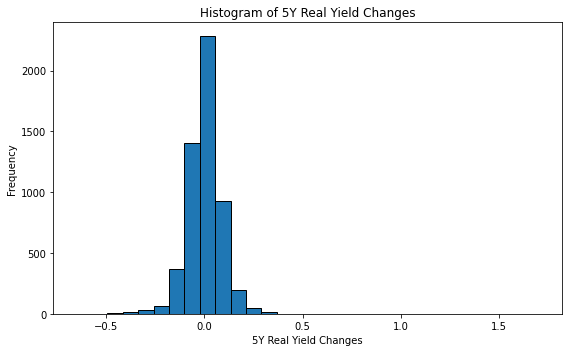

In [329]:
plt.figure(figsize=(8, 5))
plt.hist(event_data[["5Y_Real_Yield"]].diff(), bins=30, edgecolor='black')
plt.title("Histogram of 5Y Real Yield Changes")
plt.xlabel("5Y Real Yield Changes")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [330]:
lst = []

# Precompute daily real yield change
event_data["Real_Yield_Change"] = event_data["5Y_Real_Yield"].diff()

for col in spread_df.columns:
    for num in np.arange(0, 0.5, 0.05):
        # Mask where the real yield change exceeds threshold
        mask = event_data["Real_Yield_Change"].abs() > num

        # X: Real yield change only on large-move days
        X = event_data.loc[mask, ["Real_Yield_Change"]].astype(float)

        # Y: 2-day forward return of the spread
        Y = spread_df[[col]].shift(-2)

        # Align on date index
        X_aligned, Y_aligned = Y.align(X, join="inner", axis=0)

        # Run regression and tag metadata
        result = regression_stats(Y_aligned, X_aligned, constant=True, ann=1)
        result["Spread"] = col
        result["Threshold"] = num

        lst.append(result)

# Combine
diff_spreads = pd.concat(lst).set_index(["Spread", "Threshold"])

In [331]:
diff_spreads

R-squared  Residual Std. Dev.     Intercept  \
Spread    Threshold                                                
SPY - IWM 0.00        0.001662            0.006945  6.283096e-07   
          0.05        0.003317            0.007286 -5.273191e-05   
          0.10        0.007946            0.007785  8.577418e-05   
          0.15        0.023387            0.008306  4.448404e-04   
          0.20        0.048087            0.009375  1.063037e-03   
          0.25        0.028287            0.009784  1.866189e-03   
          0.30        0.104254            0.012435  3.055862e-03   
          0.35        0.147978            0.011695  1.795158e-03   
          0.40        0.322987            0.009435  3.438512e-03   
          0.45        0.534450            0.006457  4.070097e-03   
IWF - IWD 0.00        0.000019            0.006168  1.086008e-04   
          0.05        0.000033            0.006339  1.740857e-04   
          0.10        0.000146            0.006838  3.645541e-04   
          0.15        0.000850            0.007426  6.484987e-04   
          0.20        0.000826            0.008069  1.202476e-03   
          0.25        0.002277            0.009086 -9.635307e-05   
          0.30        0.001748            0.008942  9.092703e-04   
          0.35        0.000890            0.009485  2.471565e-03   
          0.40        0.009483            0.010134  2.027575e-03   
          0.45        0.018921            0.009700 -1.239440e-03   
SPY - TLT 0.00        0.000022            0.017201  2.749097e-04   
          0.05        0.000020            0.019647  1.144840e-05   
          0.10        0.000080            0.023362  3.420156e-04   
          0.15        0.000055            0.027060  6.353930e-04   
          0.20        0.000304            0.031920 -7.706382e-04   
          0.25        0.003118            0.035317  1.145742e-03   
          0.30        0.004174            0.037007  7.797189e-03   
          0.35        0.000363            0.032027  3.194062e-03   
          0.40        0.013665            0.032191  2.346028e-03   
          0.45        0.556951            0.014592 -1.483770e-02   
DBC - SPY 0.00        0.001894            0.013349 -3.532925e-04   
          0.05        0.003480            0.014824 -2.198151e-04   
          0.10        0.006594            0.017265 -7.316325e-04   
          0.15        0.012503            0.019989 -2.054181e-03   
          0.20        0.019221            0.021736 -2.239477e-03   
          0.25        0.014550            0.025378 -4.666991e-03   
          0.30        0.075641            0.030715 -6.885179e-03   
          0.35        0.109976            0.026038 -6.329430e-04   
          0.40        0.275478            0.024680  9.085357e-03   
          0.45        0.365834            0.028936  1.566834e-02   
GLD - IEF 0.00        0.001477            0.011119  2.757492e-04   
          0.05        0.002791            0.011799  2.865178e-04   
          0.10        0.007442            0.012844  5.068101e-04   
          0.15        0.012632            0.014656  8.196989e-04   
          0.20        0.022974            0.017724  8.383198e-04   
          0.25        0.043832            0.021838  2.073218e-03   
          0.30        0.152965            0.027793  5.662173e-03   
          0.35        0.147639            0.028857  6.258348e-03   
          0.40        0.174208            0.029918  7.983543e-03   
          0.45        0.330612            0.032882  2.053223e-02   

                     Real_Yield_Change  Real_Yield_Change t-stat  \
Spread    Threshold                                                
SPY - IWM 0.00               -0.003108                 -2.908820   
          0.05               -0.003308                 -2.865530   
          0.10               -0.003952                 -2.876497   
          0.15               -0.005440                 -3.137221   
          0.20               -0.006953                 -2.973265   
        

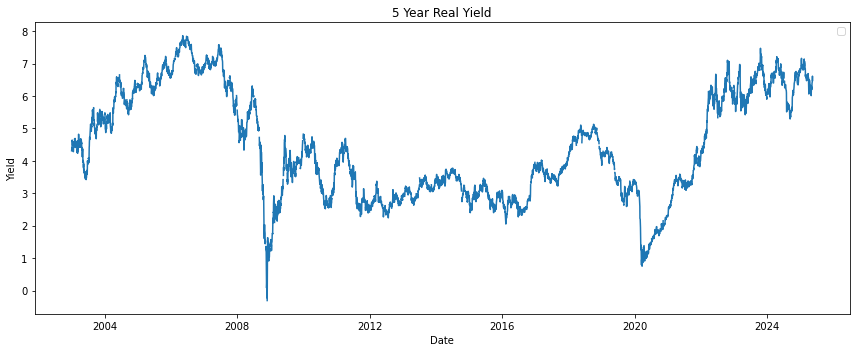

In [333]:
plt.figure(figsize=(12, 5))
plt.plot(event_data.index, event_data["5Y_Real_Yield"])
plt.title("5 Year Real Yield")
plt.xlabel("Date")
plt.ylabel("Yield")
plt.tight_layout()
plt.show()
